# Dataset, DataLoader
데이터를 처리하여 model에 공급(fit)하기 위하여 파이토치에서 torch.utils.data.Dataset과 torch.utils.data.DataLoader 클래스를 지원합니다.

- Dataset : feature와 label을 저장
- DataLoader : Dataset을 모델에 공급할 수 있도록하는 클래스 입니다.

------------------------------------------------------------------------------------------------------------

> 그렇다면 PyTorch에서 DataLoader 없이 모델 학습이 불가능한가?: **그건 아니다. 가능하다.**

PyTorch는 DataLoader 없이도 모델에 데이터를 직접 전달하여 학습(fitting)을 할 수 있습니다. 

하지만 **DataLoader**는 데이터를 효율적으로 관리하고 배치(batch) 단위로 처리하는 기능을 제공하기 때문에, 일반적으로 많이 사용됩니다.





> 1. DataLoader 없이 모델에 데이터를 피팅하는 방법:
만약 데이터를 텐서로 직접 가지고 있다면, DataLoader 없이 바로 모델에 입력 데이터를 전달할 수 있습니다.

예시:

```python
import torch
import torch.nn as nn

# 간단한 모델 정의
model = nn.Linear(10, 1)  # 입력 크기 10, 출력 크기 1

# 가상 데이터 생성
X = torch.randn(64, 10)  # 입력 데이터 (64개의 샘플, 각 샘플의 크기 10)
y = torch.randn(64, 1)   # 타깃 데이터

# 손실 함수와 옵티마이저 정의
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# 예측 및 손실 계산
pred = model(X)
loss = loss_fn(pred, y)

# 역전파 및 가중치 업데이트
optimizer.zero_grad()
loss.backward()
optimizer.step()
```

위 코드에서는 `X`와 `y`가 미니배치 데이터를 대신하며, **DataLoader 없이** 데이터를 모델에 직접 전달하여 학습을 수행합니다.

> 2. 그렇다면 왜 DataLoader를 사용하는가?:

**DataLoader**는 다음과 같은 이유로 매우 유용합니다:

- **데이터 배치 처리**: 


데이터셋을 **작은 배치(batch)** 단위로 나눠서 처리할 수 있습니다. 이것은 메모리 효율성 측면에서 중요합니다. 특히 큰 데이터셋일수록 배치 단위로 처리하지 않으면 한 번에 GPU나 CPU 메모리에 올릴 수 없습니다.


- **셔플링(Shuffling)**: 


DataLoader는 데이터를 **무작위로 섞어서(셔플링)** 제공할 수 있습니다. 이는 모델이 데이터에 순서에 의존하지 않게 만들고, 일반화 성능을 높이는 데 기여할 수 있습니다.


- **병렬 데이터 로딩**: 


DataLoader는 여러 워커(worker)를 사용하여 데이터를 **병렬로 로드**할 수 있어, 특히 큰 데이터셋을 처리할 때 I/O 병목을 줄여줍니다.


- **데이터 전처리**: 


DataLoader와 함께 **`transform`**이나 **`collate_fn`** 같은 기능을 활용하여, 데이터를 로드할 때 바로 전처리를 할 수 있습니다.

> 결론:



**DataLoader 없이도** 모델에 데이터를 직접 전달하여 학습을 할 수 있지만, 데이터셋이 크거나, 배치 단위로 학습하고, 데이터를 셔플링하거나 병렬 처리하려면 **DataLoader**를 사용하는 것이 훨씬 효율적입니다.

따라서 PyTorch에서는 **DataLoader를 사용하는 것이 일반적**이지만, 작은 데이터셋이나 단순한 경우에는 **DataLoader 없이도** 학습이 가능합니다.

------------------------------------------------------------------------------------------------------------

In [1]:
import torch

from torchvision import datasets # 위 markdown에서 말한 Dataset과는 다른 것임.
# torchvision : 파이토치 기반의 CV 도구들이 들어있는 패키지
# torchvision.datasets : Computer Vision 관련 예제 데이터 세트

from torchvision.transforms import ToTensor

# ToTensor의 역할:

#     ToTensor는 이미지 데이터를 PyTorch의 텐서(Tensor)로 변환하는 역할을 합니다. 
#     보통 딥러닝 모델에 이미지를 입력할 때 이미지를 텐서로 변환해야 하기 때문에, ToTensor는 필수적인 전처리 작업입니다.

    # 이미지 데이터를 텐서로 변환:

        # PIL.Image 객체나 NumPy 배열로 되어 있는 이미지를 PyTorch의 텐서로 변환합니다.
        # 변환된 텐서의 값은 float32 타입이며, 모델이 입력으로 받을 수 있는 형태가 됩니다.

    # 픽셀 값 범위 변경:

        # 이미지의 픽셀 값은 일반적으로 [0, 255] 범위를 가지지만, ToTensor는 이 값을 [0.0, 1.0] 범위로 정규화합니다.
        # 이 과정은 모델 학습에 적합한 입력 데이터를 제공하기 위해 필요합니다.
        # 이미지를 [0, 1] 범위로 정규화하고, 텐서의 크기를 (채널, 높이, 너비) 순서로 변환하여 딥러닝 모델에 적합한 입력 데이터를 제공합니다.

In [2]:
train_data = datasets.FashionMNIST(
    root='data', # 데이터(이미지)를 저장할 디렉토리
    train=True, # 훈련용 데이터 여부
    download=True, # 다운로드
    transform=ToTensor() # 이미지 변환. 여기서는 ndarray형식의 이미지를 pytorch tensor로 변환
)

In [3]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


# Dataset 시각화

11183
27820
58849
21057
41186
52966
5256
12331
20245


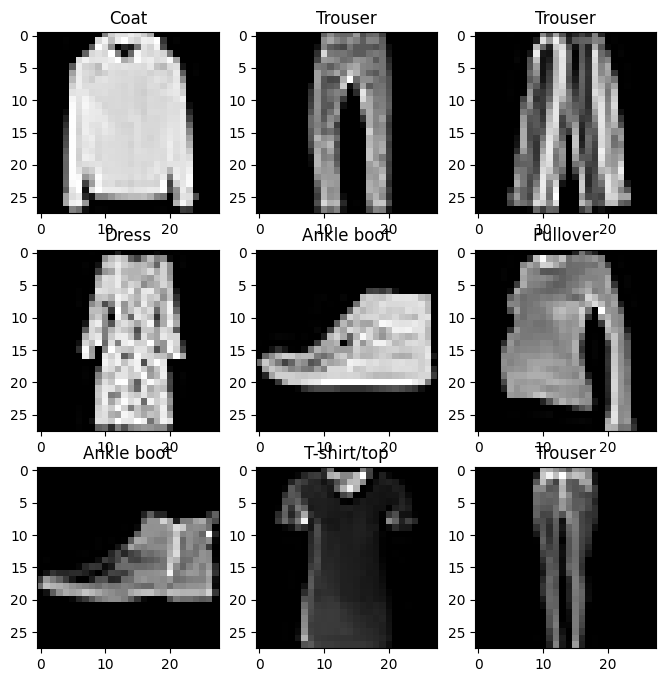

In [4]:
import matplotlib.pyplot as plt

labels_map = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1, )).item() # item이 없으면 텐서로 나옴
    print(sample_idx)

    # Dataset에서 데이터를 뽑을 예정. 이때 Dataset의 구조는 feature, target이 같이 들어있다
    feature, target = train_data[sample_idx]
    # print(feature, target) -> feature(x)와 target(y)이 같이 존재하는 데이터가 60000개 있는 데이터 셋 
    figure.add_subplot(rows, cols, i)

    plt.title(labels_map[target])
    plt.imshow(feature.squeeze(), cmap='gray')

plt.show()

feature(x)와 target(y)이 같이 존재하는 데이터가 60000개 있는 데이터 셋을 일일이 보면 느림 -> 배치를 이용하자

# DataLoader 만들기

데이터로더는 빨대 역할을 한다. 

즉, Train 데이터 셋과 Test 데이터 셋에 어떻게 데이터를 원래 데이터 셋에서 빨아 담을건지를 정한다.python



```python
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)



**train_dataloader와 test_dataloader는 실제로 데이터 자체를 담고 있는 것이 아니라, 데이터셋에서 데이터를 어떻게 불러올지에 대한 설정을 정의하는 객체이다.**

DataLoader는 배치 크기와 셔플 여부 등 데이터 로드 방식을 정의하고, 변수를 호출할 때마다 정의된 방식대로 데이터를 배치 단위로 가져오고 처리한다.

따라서 변수를 호출할 때 안에 있는 값이 나오는 것이 아니라, DataLoader에 정의된 설정에 따라 데이터가 배치 단위로 불러와지고 처리되는 것이다.

In [22]:
BATCH_SIZE = 64

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# shuffle: 1에폭 당 데이터 로더에서 데이터를 읽어올 때 마다 랜덤하게 섞게 된다

        # shuffle을 걸어주면 모델이 데이터를 조금 더 어렵게 학습한다.

                # **에폭(Epoch)**은 딥러닝 또는 머신러닝에서 전체 데이터셋을 한 번 학습하는 과정을 의미합니다. 
                # 에폭은 모델을 훈련할 때 중요한 개념으로, 훈련 데이터를 반복적으로 모델에 학습시키기 위해 사용됩니다.
                
                # 에폭의 역할:
                #     훈련 데이터셋을 모델에 한 번 주입하고 가중치를 업데이트하는 과정에서, 보통 한 번의 에폭만으로는 모델이 충분히 학습되지 않습니다. 
                #     따라서 여러 에폭 동안 데이터를 반복해서 모델에 학습시키며 가중치를 계속 업데이트합니다.
                # 세부 설명:
                #     에폭은 전체 데이터셋이 한 번 모델에 주입되는 과정을 의미합니다.
                #     하나의 에폭이 끝나면, 모델은 데이터셋에 포함된 모든 데이터에 대해 학습을 한 번 완료한 것입니다.
                #     하지만 보통 하나의 에폭만으로 모델이 최적화되기에는 부족하기 때문에, 훈련 과정에서는 여러 에폭을 사용하여 학습을 반복합니다.
                # 에폭, 배치, 스텝의 관계:
                #     에폭(Epoch): 전체 데이터셋을 한 번 모델에 학습시키는 과정입니다.
                #     배치(Batch): 데이터셋을 한 번에 다 학습시키는 것은 비효율적이므로, 데이터를 여러 작은 그룹(배치)으로 나누어 학습합니다. 
                #                 배치 하나는 모델에 주입되는 데이터의 작은 묶음입니다.
                #     스텝(Step): 각 배치가 모델에 주입되어 학습이 진행되는 한 번의 과정을 스텝이라고 합니다. 
                #                하나의 에폭 내에는 여러 스텝이 포함되어 있습니다.
                #     예시:
                #     만약 데이터셋에 1,000개의 샘플이 있고, **배치 크기(batch size)**를 100으로 설정했다면, 하나의 에폭 동안 10개의 배치가 모델에 주입됩니다.
                #     - 1 에폭 = 1,000개의 샘플이 한 번씩 모델에 학습됨
                #     - 배치 크기 100 = 한 번에 100개의 샘플씩 모델에 주입
                #     - 스텝 = 배치 단위로 학습이 이루어지는 한 번의 과정. 1 에폭 동안 10번의 스텝이 발생함.


In [7]:
# 테스트 데이터 불러오기
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

# 테스트 데이터 세트는 굳이 섞을 필요가 없다. 어차피 전체 데이터에 대한 성능(loss, accuracy)를 확인만 하기 때문에
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

## DataLoader 시각화
- DataLoader 객체는 파이썬의 Generator 자료구조에 해당하며, Iterator를 직접 움직여 가면서 데이터를 Iterate 할 수 있습니다.
- 이 때 설정한 BATCH_SIZE 만큼 데이터를 추출해 냅니다.

In [8]:
# DataLoader 시각화에 대한 종합 설명

        # DataLoader는 PyTorch에서 데이터셋을 효율적으로 처리하기 위해 제공되는 도구입니다. 
        # 딥러닝 모델을 학습시킬 때, 데이터를 작은 배치(batch) 단위로 나누어 메모리 사용을 최적화하고 학습 속도를 높일 수 있습니다. 
        # 이를 이해하기 위해 **이터레이터(Iterator)**와 **제너레이터(Generator)**의 개념을 함께 살펴보겠습니다.

# 1. DataLoader와 배치 처리

    # DataLoader는 이터레이터처럼 동작하며, 매번 일정한 크기의 배치를 반환합니다. 데이터셋 전체를 한 번에 처리하지 않고, 모델이 학습 가능한 크기로 데이터를 나누어 처리합니다.

        # 배치(Batch): 한 번에 학습하는 데이터의 묶음입니다. 예: batch_size=32로 설정하면 모델에 한 번에 32개의 샘플을 전달합니다.
        # 에폭(Epoch): 전체 데이터셋을 한 번 학습하는 과정을 의미합니다. 한 에폭 동안 데이터는 배치 단위로 모델에 전달됩니다. (전체 데이터셋 양이 320이고, 배치 사이즈가 32이면 1 에폭 당 10 배치가 모델에 전달)

            # from torch.utils.data import DataLoader

            # # DataLoader 객체 생성
            # data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

            # # 배치 단위로 데이터를 가져옴
            # for batch in data_loader:
            #     print(batch)  # 32개의 샘플 출력

# 2. 이터레이터와 제너레이터의 개념 적용

    # **이터레이터(Iterator)**와 **제너레이터(Generator)**는 DataLoader의 동작 방식과 밀접한 관련이 있습니다. 
    # DataLoader는 데이터를 한 번에 처리하지 않고, 필요할 때마다 순차적으로 데이터를 제공합니다.

        # 이터레이터: 데이터를 순차적으로 반환하는 객체로, for 루프나 next()로 데이터를 얻을 수 있습니다.
        # 제너레이터: 데이터를 한 번에 모두 생성하지 않고, 필요할 때 값을 하나씩 생성해 반환하는 방식입니다.
            # 제너레이터는 이터레이터의 하위 개념
            # 제너레이터는 이터레이터의 특별한 형태로, `yield` 키워드를 사용해 이터레이터 프로토콜 `__iter__()`, `__next__()`을 자동으로 구현하며,  # 메모리 효율적인 방법으로 데이터를 순차적으로 생성하는 데 적합

        # DataLoader에서 이터레이터 사용

            # data_iter = iter(data_loader)
            # first_batch = next(data_iter)  # 첫 번째 배치 가져오기
            # print(first_batch)
                # 왜 첫 번째 배치 가져올 때 next를 적용하는가? 이래야 첫 번째 데이터 배치를 꺼내오기 때문 

# 3. DataLoader의 시각화

    # DataLoader는 데이터를 배치 단위로 랜덤하게 선택하여 모델에 전달할 수 있고, 이를 시각화할 수도 있습니다. 
    # 시각화를 통해 데이터가 잘 로드되는지 확인하는 데 유용합니다.

        # import torch
        # import matplotlib.pyplot as plt
        # from torchvision.transforms import ToTensor
        # from torchvision.datasets import MNIST
        # from torch.utils.data import DataLoader

        # # MNIST 데이터셋 로드
        # train_data = MNIST(root='./data', train=True, download=True, transform=ToTensor())

        # # DataLoader 설정
        # batch_size = 9
        # data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

        # # 시각화 설정
        # figure = plt.figure(figsize=(8, 8))
        # cols, rows = 3, 3

        # # 데이터 로드 및 시각화
        # for i in range(1, cols * rows + 1):
        #     # DataLoader에서 랜덤한 배치의 샘플을 가져옴
        #     data_iter = iter(data_loader)
        #     sample = next(data_iter)[0][0]  # 배치에서 첫 번째 이미지 샘플 추출

        #     figure.add_subplot(rows, cols, i)  # 3x3 그리드에 이미지 추가
        #     plt.axis("off")  # 축 숨김
        #     plt.imshow(sample.squeeze(), cmap="gray")  # 이미지를 회색조로 표시

        # plt.show()

        # 코드 설명:

            # DataLoader는 MNIST 데이터셋을 9개의 샘플로 나누어 배치 단위로 제공합니다.
            # iter(data_loader)는 이터레이터를 생성하여 첫 번째 배치를 가져옵니다.
            # figure.add_subplot()을 사용해 3x3 그리드에 이미지를 배치합니다.
            # plt.imshow()로 이미지를 시각화합니다.

# 4. DataLoader의 내부 동작 요약

        # 이터레이터처럼 동작: DataLoader는 이터레이터로서 for 루프나 next()로 데이터를 순차적으로 로드합니다.
        # 제너레이터처럼 데이터 생성: 데이터를 메모리에 모두 올리지 않고, 배치 크기만큼 생성하여 메모리 효율적으로 다룹니다.
        # 배치 단위 데이터 처리: 데이터셋을 한 번에 처리하지 않고, 배치 단위로 나누어 처리하여 모델 학습을 돕습니다.

# 종합 요약

# DataLoader는 이터레이터/제너레이터 개념을 활용해 데이터를 배치 단위로 효율적으로 로드하는 도구입니다.
# 배치 크기를 설정하여 메모리를 최적화하고, 큰 데이터셋을 처리할 때 유리합니다.
# DataLoader는 데이터를 한 번에 처리하지 않고, 필요할 때마다 데이터를 가져오는 방식으로 메모리 효율성을 높입니다.
# 시각화는 DataLoader로 데이터를 확인하고 이해하는 데 유용한 방법이며, PyTorch와 Matplotlib을 사용하여 데이터를 쉽게 시각화할 수 있습니다.

In [9]:
# dataloader의 Iterator가 한칸 움직일 때 마다(next) BATCH_SIZE만큼 데이터를 가져온다.
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([1, 28, 28])
torch.Size([28, 28])


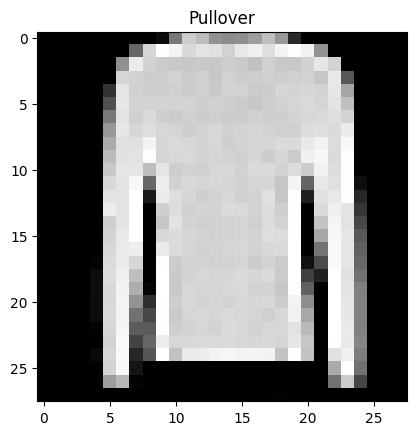

In [10]:
train_features, train_labels = next(iter(train_dataloader))

print(train_features[0].size())
feature = train_features[0].squeeze() # 쓰잘데기 없는 차원 쥐어짜버리기
print(feature.size())

label = train_labels[0].item()

plt.title(labels_map[label])
plt.imshow(feature, cmap='gray')
plt.show()

# CustomDataset ⭐️
`torch.utils.data.Dataset` 클래스를 상속받으면 개발자가 직접 파이토치 Dataset을 구성할 수 있습니다. 필수로 오버라이딩 해야하는 메소드는 다음과 같습니다.
- `__init__` : 생성자 입니다. Dataset 에 담을 데이터, 전처리가 필요하다면 `transform` 객체를 같이 받습니다.
- `__len__` : Dataset에 있는 데이터의 개수
- `__getitem__` : 몇 번째 데이터를 가져올지를 정의하는 함수입니다. 만약 `transform`이 있다면 변환 처리까지 해주게 됩니다.

In [11]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, features, transform=None):
        self.features = features
        self.transform = transform
        self.len = features.shape[0] # 항상 shape의 첫 번째에는 데이터의 전체 개수가 들어있다.

    def __len__(self):
        # __len__ 메소드는 len() 함수를 호출 했을 때 자동으로 실행되는 매직 메소드
        # print("__len__ called")
        return self.len

    def __getitem__(self, idx):
        # __getitem__ 메소드는  [ ] 기호를 이용해서 아이템을 뽑아낼 때 호출되는 매직 메소드(연산자 오버로딩)
        # print("__getitem__ called")
        feature = self.features[idx]

        if self.transform:
            feature = self.transform(feature)

        return feature

In [12]:
# **오버로딩(Overloading)**과 **오버라이딩(Overriding)**의 어원은 각각 **"Over"**와 "Load", 그리고 **"Over"**와 **"Ride"**에서 유래되었습니다. 
# 이 단어들은 각각의 프로그래밍 개념을 잘 설명해주는 의미를 담고 있습니다.

# 1. 오버로딩 (Overloading)
    # Over: 위에, 초과하여
    # Load: 짐을 싣다

    # 의미 분석:
        # **"Overloading"**은 어떤 것 위에 짐을 더 많이 싣는다는 의미입니다. 프로그래밍에서는 같은 이름의 메서드에 더 많은 기능을 얹는 것으로 이해할 수 있습니다.
        # 같은 이름의 메서드에 여러 가지 버전의 기능을 올려놓고, 인자의 종류나 개수에 따라 적절한 버전을 선택해서 사용하는 개념입니다.
    # 예시:
        # 물리적으로 무언가에 추가적인 짐을 더 얹는다는 개념에서 출발하여, 코드에서는 동일한 이름의 메서드에 추가적인 역할을 얹는 것을 의미하게 되었습니다.

# 2. 오버라이딩 (Overriding)
    # Over: 위에, 초과하여
    # Ride: 타다, 덮다

    # 의미 분석:
        # **"Overriding"**은 무언가를 넘어선다는 의미에서 왔습니다. 특히 여기서는 덮어씌운다는 개념이 중요합니다.
        # 프로그래밍에서는 부모 클래스의 메서드를 자식 클래스에서 덮어쓴다는 의미입니다. 즉, 기존에 있던 부모의 메서드를 무시하고, 새로운 메서드로 덮어씌우는 개념입니다.
    # 예시:
    # 원래 있던 메서드를 자식 클래스에서 새로운 메서드로 타고 넘는 것 또는 덮어버리는 것으로 이해할 수 있습니다.

# 종합적인 어원 분석:
    # 오버로딩(Overloading): 같은 메서드 이름에 여러 가지 다른 기능을 얹는 것 (즉, 많은 것을 더한다는 개념에서 출발).
    # 오버라이딩(Overriding): 기존의 기능을 넘어 새로운 기능을 덮어쓴다는 의미에서 유래. (즉, 덮어버리고, 위에 새로운 것을 쌓는다는 개념에서 출발).
    # 이 개념들은 각각 프로그래밍에서의 확장과 변경의 의미를 잘 표현하는 용어로 자리잡았습니다.

In [13]:
# 사용자 정의 데이터 변환기(transform) 만들기
# square(data): 데이터를 제곱하는 사용자 정의 함수(변환기)
def square(data):
    # 데이터를 제곱하는 데이터 변환기
    return data ** 2

# 이 부분은 **데이터 변환기(transform)**를 정의하는 코드입니다. 
# 여기서 square(data)는 데이터를 제곱하는 간단한 변환 함수입니다. 
# 즉, 이 함수는 입력 데이터인 data를 받아 그 값을 제곱하여 반환합니다.

# 왜 필요한가?
# 데이터 변환기는 데이터 전처리나 변형 작업을 자동으로 수행하는 데 유용합니다. 
# 딥러닝 모델에 데이터를 입력하기 전에 데이터를 일정한 형태로 변환해야 할 때 사용됩니다.
# 예를 들어, 이미지를 정규화하거나 크기 조정을 할 때, 이런 변환기(transform)를 활용합니다.
# 여기서는 사용자 정의 데이터 변환기인 square를 정의했으며, 각 데이터에 대해 제곱 연산을 수행하는 예시입니다.

In [14]:
# 개발자가 직접 만든 함수를 파이토치의 변환기로 등록
# tr.Compose([square]): 여러 개의 변환기를 묶어서 순차적으로 적용할 수 있는 파이토치의 유틸리티로, 여기서는 square 변환을 파이토치의 전처리 파이프라인에 추가.
import torchvision.transforms as tr
transform = tr.Compose([square])
transform

# 이 코드는 사용자 정의 함수 square를 파이토치의 **transform**으로 등록하는 과정입니다. 
# torchvision.transforms.Compose는 여러 개의 변환기를 연속적으로 적용할 수 있게 해주는 유틸리티입니다.
# **tr.Compose([square])**는 square 함수를 transform 객체로 묶는 역할을 합니다.
# 이렇게 하면, CustomDataset에서 데이터를 불러올 때 square 함수가 자동으로 적용됩니다. 
# 즉, 데이터가 __getitem__() 메서드에서 로드될 때 제곱 변환이 자동으로 적용됩니다.

# 왜 필요한가?

# 파이토치의 변환기 체인을 활용하면 여러 가지 전처리 작업을 순서대로 쉽게 수행할 수 있습니다.
# 예를 들어, 이미지를 불러올 때 크기를 조정하고, 정규화하고, 텐서로 변환하는 과정을 자동으로 처리할 수 있습니다.
# 여기서는 **사용자 정의 함수인 square**를 추가해 데이터에 제곱 변환을 자동으로 적용하기 위해 Compose를 사용했습니다.

Compose(
    <function square at 0x30a303280>
)

In [15]:
import numpy as np

sample_data = np.arange(10)
custom_ds = CustomDataset(sample_data, transform=transform)

In [16]:
len(custom_ds)

10

In [17]:
custom_ds[2]

4

In [18]:
custom_ds[3]

9

In [19]:
custom_ds[4]

16

In [20]:
custom_dl = DataLoader(custom_ds, batch_size=2, shuffle=True)

In [21]:
for _ in range(5):
    for data in custom_dl:
        print(data)

    print('='*20)

tensor([ 4, 49])
tensor([81, 16])
tensor([1, 9])
tensor([25,  0])
tensor([64, 36])
tensor([ 0, 81])
tensor([ 9, 64])
tensor([49,  4])
tensor([36,  1])
tensor([25, 16])
tensor([ 4, 49])
tensor([64, 25])
tensor([81,  9])
tensor([0, 1])
tensor([16, 36])
tensor([16, 36])
tensor([ 9, 64])
tensor([4, 1])
tensor([25, 81])
tensor([49,  0])
tensor([16,  1])
tensor([64, 81])
tensor([9, 0])
tensor([ 4, 25])
tensor([36, 49])
